## Edmond Tetsuekoue
## Regis University
## MSDS692 - Data Science Practicum I
## January 10, 2023

# Problem or Situation
Chronic kidney disease is a pathology that affects the kidney, rendering it inefficient or completely unable to filter the blood passing through it. In this practicum, I will investigate the likelihood of a patient to suffer of chronic kidney disease, in other words, I will attempt to predict through machine learning modeling the odds of an individual being diagnosed with the disease based on certain factors. 

## Research Question 
What is(are) the most critical factor(s) that influence the likelihood of a patient to suffer of chronic kidney disease (ckd)?

## The Data
For this project, I will be using a copy of the "kidney_disease" dataset from the data repositoty of the University of California Irvine (UCI). The dataset can be found at: https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease. This is a multivariate dataset made of real data. It has 400 Instances and 25 attributes. There are missing values in the dataset making it interesting for this project because this will involve a data engineering and pre-processing aspect.   

## 1) Data cleaning and preparation

### Importing packages.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
#conda install -c https://conda.anaconda.org/plotly plotly

In [4]:
#! pip install plotly

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Next step, loading the data.

By taking a quick look at the file through the editor notepad++, the file appeared to be comma-delimited. Next, let us attempt to open it up with the use of the classical method.

### Getting to the file directory !

In [6]:
! dir "C:\Master In Data Science Regis University\MSDS695_X70_Data Science Practicum I"

 Volume in drive C is OS
 Volume Serial Number is 881C-FF69

 Directory of C:\Master In Data Science Regis University\MSDS695_X70_Data Science Practicum I

03/05/2023  06:34 PM    <DIR>          .
01/24/2023  01:13 AM    <DIR>          ..
01/17/2023  07:33 PM           815,914 dataverse_files.zip
03/05/2023  06:30 PM           883,200 Edmond Tetsuekoue Final Practicum 1 Presentation.ppt
01/17/2023  10:47 PM           199,168 Edmond Tetsuekoue Practicum1's Proposal.ppt
01/11/2023  04:47 PM            48,551 kidney_disease.csv
01/17/2023  07:21 PM       328,279,281 U.S._Chronic_Disease_Indicators__CDI_.csv
               5 File(s)    330,226,114 bytes
               2 Dir(s)  24,133,914,624 bytes free


### Opening up the file.

In [7]:
df= pd.read_csv('C:\Master In Data Science Regis University\MSDS695_X70_Data Science Practicum I\kidney_disease.csv', sep=',')

To preserve a fresh and untouched copy of our dataset throughout the project let us copy the original dataset into a work-in-progress dataset that we may name "df1" for now. This will ensure that if needed we can still have access to an original copy of the dataset that has not been processed.

In [8]:
df1=df

Taking a quick look at the file's first columns with the use of the head() method!

In [9]:
df1.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

Using the info() method to pull out more info about the dataset. 

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

The execution of the info() function reveals more information about the dataset. The dataset possesses "400" rows ranging from "0" to "399". It also has 25 columns (id, age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sob, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification). Among those 25 columns, there are eleven of the float type, one of the int type, and fourteen of the object type. The dataset occupies about 81.4 KB of space on the disk.

At this initial stage, we are trying to get to know our dataset better. The execution of the describe() function will provide us with additional information about our dataset.

In [11]:
df1.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

1)  age:  Age(numerical) --> age in years

2)  bp:   Blood Pressure(numerical) bp in mm/Hg

3)  sg:   Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025) 
concentration of particles in urine (density of urine compared with the density of water)

4)  al:   Albumin(nominal)al - (0,1,2,3,4,5)

5)  su:   Sugar(nominal) su - (0,1,2,3,4,5)

6)  rbc:  Red Blood Cells(nominal) rbc - (normal,abnormal)

7)  pc:   Pus Cell (nominal)pc - (normal,abnormal)
pus cells (White blood cells) in urine (Pyuria) are signs of infection, it is significant if there are more than 4 pus cells/HPF in a centrifuged urine sample.

8)  pcc:  Cell clumps(nominal)pcc - (present,notpresent)
Large clumps of WBCs are typically observed when there is inflammation or bacterial infections of the renal and urinary tract.

9)  ba:   Bacteria(nominal) ba - (present,notpresent)

10) bgr:  Blood Glucose Random(numerical) bgr in mgs/dl

11) bu:   Blood Urea(numerical) bu in mgs/dl

12) sc:   Serum Creatinine(numerical) sc in mgs/dl

13) sod:  Sodium(numerical) sod in mEq/L

14) pot:  Potassium(numerical) pot in mEq/L

15) hemo: Haemoglobin(numerical) hemo in gms

16) pcv:  Packed Cell Volume(numerical)
Hematocrit (HCT) and packed cell volume (PCV) are used to measure red blood cell mass. An increase in red blood cell mass is equivalent to erythrocytosis and a decrease indicates an anemia.

17) wc:  White Blood Cell Count(numerical) wc in cells/cumm

18) rc:  Red Blood Cell Count(numerical) rc in millions/cmm

19) htn: Hypertension(nominal) htn - (yes,no)

20) dm:  Diabetes Mellitus(nominal) dm - (yes,no)

21) cad: Coronary Artery Disease(nominal) cad - (yes,no)

22) appet: Appetite(nominal) ppet - (good,poor)

23) pe:   Pedal Edema(nominal) pe - (yes,no)

24) ane:  Anemia(nominal)ane - (yes,no)

25) classification: Class (nominal) class - (ckd,notckd)

The "describe" method provides us with additional information about the "kidney_disease" dataset. It also gives us important descriptive statistical information such as the count, the mean, the standard deviation, the minimum, the maximum, and the percentile range for each of the columns with numerical values.  

The next step will consist of looking at the uniqueness and consistency across the columns to identify the elements that may need to be corrected. This is important because sometimes typos and misspellings get recorded in the dataset and if these types of errors are not identified and cleaned it may affect the result of the prediction. An example of this could be a "yes" entered as "Yes" or "\yes" or " yes" or even "yes ". The unique() method is the function that I will use to identify those potential errors. The approach here is to isolate all the elements of each column as a unique entity so that there are no repeatable values. Doing that that will help us at looking through all the values as unique and it will be easy to identify the anomaly among those unique values.

In [12]:
for i in df1.columns:
    print('unique values in "{}":\n'.format(i),df1[i].unique())

unique values in "id":
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 24

In [13]:
for i in df1.columns:
    print('unique values in "{}":\n'.format(i),df1[i].nunique())

unique values in "id":
 400
unique values in "age":
 76
unique values in "bp":
 10
unique values in "sg":
 5
unique values in "al":
 6
unique values in "su":
 6
unique values in "rbc":
 2
unique values in "pc":
 2
unique values in "pcc":
 2
unique values in "ba":
 2
unique values in "bgr":
 146
unique values in "bu":
 118
unique values in "sc":
 84
unique values in "sod":
 34
unique values in "pot":
 40
unique values in "hemo":
 115
unique values in "pcv":
 44
unique values in "wc":
 92
unique values in "rc":
 49
unique values in "htn":
 2
unique values in "dm":
 5
unique values in "cad":
 3
unique values in "appet":
 2
unique values in "pe":
 2
unique values in "ane":
 2
unique values in "classification":
 3


In [14]:
for i in df1.columns:
    print('unique values in "{}":\n'.format(i),df1[i].value_counts())

unique values in "id":
 0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64
unique values in "age":
 60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64
unique values in "bp":
 80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64
unique values in "sg":
 1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64
unique values in "al":
 0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64
unique values in "su":
 0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64
unique values in "rbc":
 normal      201
abnormal     47
Name: rbc, dtype: int64
unique values in "pc":
 normal      259
abnormal     76
Name: p

- In the "pcv" column for example It is to indentify "\t" in a column with numerical value. The nature of the type of the column for example leads me to understand that this is a typo. Because I can not just randomly pick a number to replace it, I will replace it with a NaN for now and will come back to it when dealing with NaNs. There is a similar issue in the "rc" column.

- In the "dm" column for example, there is a "\tno" value for example that was entered in the place of a "no", this should be addressed by replacing the "\tno" value with the "no". There is an exact similar issue on the "cad" column.

- In the "wc" column for example, it is also to identify a "\t" character value that is out of place and should be replaced by the NaN value for now. In the same column, it is also to be noticed a "\t6200" and a "\t8400" that were probably mistyped.

- In the "cad" column, there is a "\tno" value that was mistyped and will need to be corrected.

- In the "Classification" column, for instance, there was a "ckd\t" value that was entered in place of "ckd" that should be addressed.

Below is a script that has been put together to address the issues compiled.

In [15]:
for i in range(df1.shape[0]):
    if df1.iloc[i,25]=='ckd\t':
        df1.iloc[i,25]='ckd'
    if df1.iloc[i,20] in [' yes','\tyes']:
        df1.iloc[i,20]='yes'
    if df1.iloc[i,20]=='\tno':
        df1.iloc[i,20]='no'
    if df1.iloc[i,21]=='\tno':
        df1.iloc[i,21]='no'
    if df1.iloc[i,16]=='\t?':
        df1.iloc[i,16]=np.nan
    if df1.iloc[i,16]=='\t43':
        df1.iloc[i,16]='43'
    if df1.iloc[i,17]=='\t?':
        df1.iloc[i,17]=np.nan
    if df1.iloc[i,17]=='\t6200':
        df1.iloc[i,17]= '6200'
    if df1.iloc[i,17]=='\t8400':
        df1.iloc[i,17]= '6200'
    if df1.iloc[i,18]=='\t?':
        df1.iloc[i,18]=np.nan
    if df1.iloc[i,25]=='ckd':
        df1.iloc[i,25]='yes'
    if df1.iloc[i,25]=='notckd':
        df1.iloc[i,25]='no'

Before continuing to clean the data, I believe it will be beneficial for me to replace the generic names of the columns with new names that have direct meaning and that can be understood easily. This will help me at understanding the data better and quickly and at the end, it will also help me during my presentation because at the end of the day, "Blood Pressure" sounds better to everyone than "BP" just like "Sodium" is clearer to everyone than "sod".

In [16]:
Meaningful_Names=['PatientId','Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic_Kidney_Disease']
df1.columns=Meaningful_Names

Now, let us see how the dataset looks like.

In [17]:
df1.head()

PatientId  Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  \
0          0       48.0                    80.0             1.020      1.0   
1          1        7.0                    50.0             1.020      4.0   
2          2       62.0                    80.0             1.010      2.0   
3          3       48.0                    70.0             1.005      4.0   
4          4       51.0                    80.0             1.010      2.0   

   Sugar Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  ...  \
0    0.0             NaN    normal      notpresent  notpresent  ...   
1    0.0             NaN    normal      notpresent  notpresent  ...   
2    3.0          normal    normal      notpresent  notpresent  ...   
3    0.0          normal  abnormal         present  notpresent  ...   
4    0.0          normal    normal      notpresent  notpresent  ...   

   Packed Cell Volume  White Blood Cells (cells/cmm)  \
0                  44                           7800   
1                  38                           6000   
2                  31                           7500   
3                  32                           6700   
4                  35                           7300   

   Red Blood Cells (millions/cmm)  Hypertension  Diabetes Mellitus  \
0                             5.2           yes                yes   
1                             NaN            no                 no   
2                             NaN            no                yes   
3                             3.9           yes                 no   
4                             4.6            no                 no   

   Coronary Artery Disease Appetite Pedal Edema Anemia Chronic_Kidney_Disease  
0                       no     good          no     no                    yes  
1                       no     good          no     no                    yes  
2                       no     poor          no    yes                    yes  
3                       no     poor         yes    yes                    yes  
4                       no     good          no     no                    yes  

[5 rows x 26 columns]

In [18]:
df1.tail()

PatientId  Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  \
395        395       55.0                    80.0             1.020      0.0   
396        396       42.0                    70.0             1.025      0.0   
397        397       12.0                    80.0             1.020      0.0   
398        398       17.0                    60.0             1.025      0.0   
399        399       58.0                    80.0             1.025      0.0   

     Sugar Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  ...  \
395    0.0          normal    normal      notpresent  notpresent  ...   
396    0.0          normal    normal      notpresent  notpresent  ...   
397    0.0          normal    normal      notpresent  notpresent  ...   
398    0.0          normal    normal      notpresent  notpresent  ...   
399    0.0          normal    normal      notpresent  notpresent  ...   

     Packed Cell Volume  White Blood Cells (cells/cmm)  \
395                  47                           6700   
396                  54                           7800   
397                  49                           6600   
398                  51                           7200   
399                  53                           6800   

     Red Blood Cells (millions/cmm)  Hypertension  Diabetes Mellitus  \
395                             4.9            no                 no   
396                             6.2            no                 no   
397                             5.4            no                 no   
398                             5.9            no                 no   
399                             6.1            no                 no   

     Coronary Artery Disease Appetite Pedal Edema Anemia  \
395                       no     good          no     no   
396                       no     good          no     no   
397                       no     good          no     no   
398                       no     good          no     no   
399                       no     good          no     no   

    Chronic_Kidney_Disease  
395                     no  
396                     no  
397                     no  
398                     no  
399                     no  

[5 rows x 26 columns]

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PatientId                       400 non-null    int64  
 1   Age (yrs)                       391 non-null    float64
 2   Blood Pressure (mm/Hg)          388 non-null    float64
 3   Specific Gravity                353 non-null    float64
 4   Albumin                         354 non-null    float64
 5   Sugar                           351 non-null    float64
 6   Red Blood Cells                 248 non-null    object 
 7   Pus Cells                       335 non-null    object 
 8   Pus Cell Clumps                 396 non-null    object 
 9   Bacteria                        396 non-null    object 
 10  Blood Glucose Random (mgs/dL)   356 non-null    float64
 11  Blood Urea (mgs/dL)             381 non-null    float64
 12  Serum Creatinine (mgs/dL)       383 

The renaming went very well and now we can see that all the columns of our dataset have names that can be better understood. At the same time, it can be noted that even though the dataset has done a great job regarding the type used for the attributes there is still some room for improvement at this stage of data cleaning. Attributes holding important data such as the "Packed Cell Volume", "White Blood Cells" and the "Red Blood Cells", for example, appear to have been entered as categorical (object) values when they should normally have been entered as continuous (numerical). It is important for us to fix this issue at this stage because, at a later stage, we will be replacing NaNs based on if the values are of a categorical or continuous type. 

This issue of type mismatch in those three columns can be observed when executing the script to check the uniqueness of the elements.

In [20]:
for i in df1.columns:
    print('unique values in "{}":\n'.format(i),df1[i].unique())

unique values in "PatientId":
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In those three columns ("Packed Cell Volume", "White Blood Cells" and the "Red Blood Cells") we can see that their values are entered with the two tics " '' " characteristics of the categorical type. The script below will help us convert the values of those columns from categorical to numeric. 

The first script creates a list named "columnlist" to hold the values of all the three columns that currently hold categorical attributes and that I would like to convert to numerical, then it loops through all the columns that are already set to numerical and append the three columns to the list of all the current continuous attributes before converting all of them to numerical columns.

In [21]:
columnslist=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in df1.columns:
    if df1[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+columnslist

The second script convert the values of those three columns to the numerical type if they are not.

In [22]:
for col in columnslist:
        df1[col]=df1[col].astype('float')

In [23]:
numeric

['Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

Now, let us check if the scripts have operated what they were supposed to do by running the unicity check script.

In [24]:
for i in df1.columns:
    print('unique values in "{}":\n'.format(i),df1[i].unique())

unique values in "PatientId":
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

By looking at the result of the above script specifically focusing on the three columns involved, we can see that the values were changed from categorical to numerical. The info() method can also confirm if the type of those three columns has been changed from "object" to "float".  

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PatientId                       400 non-null    int64  
 1   Age (yrs)                       391 non-null    float64
 2   Blood Pressure (mm/Hg)          388 non-null    float64
 3   Specific Gravity                353 non-null    float64
 4   Albumin                         354 non-null    float64
 5   Sugar                           351 non-null    float64
 6   Red Blood Cells                 248 non-null    object 
 7   Pus Cells                       335 non-null    object 
 8   Pus Cell Clumps                 396 non-null    object 
 9   Bacteria                        396 non-null    object 
 10  Blood Glucose Random (mgs/dL)   356 non-null    float64
 11  Blood Urea (mgs/dL)             381 non-null    float64
 12  Serum Creatinine (mgs/dL)       383 

It is clear to be seen that the "type" of the three columns ("Packed Cell Volume", "White Blood Cells" and the "Red Blood Cells") has been updated from "object" to "float64".

Now that we have taken care of mistypes, misspelled, mismatched, and other types of data cleaning we can address the important issue of missing values (NaNs) next.

### Investigating Missing Values

Next, let us check to see If our dataset possesses missing values and which are columns with those missing values. The execution of the "isnull()" function coupled with the any() function will assist us to look into the missing values.

In [26]:
df1.isnull().values.any()

True

The result "True" returned is the confirmation that the dataset possesses missing values.

The next step will consist of coupling the "isnull()" function this time with the sum() function to find out what exactly are the columns with missing values.

In [27]:
df1.isnull().sum(axis = 0)

PatientId                           0
Age (yrs)                           9
Blood Pressure (mm/Hg)             12
Specific Gravity                   47
Albumin                            46
Sugar                              49
Red Blood Cells                   152
Pus Cells                          65
Pus Cell Clumps                     4
Bacteria                            4
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Sodium (mEq/L)                     87
Potassium (mEq/L)                  88
Hemoglobin (gms)                   52
Packed Cell Volume                 71
White Blood Cells (cells/cmm)     106
Red Blood Cells (millions/cmm)    131
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic_Kidney_Disease              0
dtype: int64

The execution of the "isnull().sum(axis = 0)" function above is showing us that all the columns possess NaNs except one single column (The Classification column)

Now that we have figured out which columns possess NaNs, the next step consists of finding their types because that will help us at determining which method is the best at handling those missing values. Depending on if the values are continuous or categorical the approach may differ. For continuous values, it is widely recommended to pursue the average while categorical variables usually require the use of the mode.

The info() function will assist us in finding the type of all the attributes. Before re-running this method on the dataset it will be a good idea to remove the "PatientId" column as it may not be of any help to us moving forward.

In [28]:
df1.drop('PatientId',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

The response variable's column also called the target column (Chronic Kidney Disease) at the center of my analysis question does not have any NaNs, this is a good thing. It can be noticed that there are currently 14 columns with a continuous variable as type and 11 columns defined as categorical. That was important to sort out elements by their type because we can not use the same query to globally update all the elements of different types at the same time. I will write two blocks of queries.

1) The first block to replace the NaNs of elements of the "float64" type with the mice() 

Age (yrs), Blood Pressure (mm/Hg), Specific Gravity, Albumin, Sugar, Blood Glucose Random (mgs/dL), Blood Urea (mgs/dL), Serum Creatinine (mgs/dL), Sodium (mEq/L), Potassium (mEq/L), Hemoglobin (gms), Packed Cell Volume, White Blood Cells (cells/cmm), Red Blood Cells (millions/cmm).           

2) The second block of the query to replace the NaNs elements of the "object" type with the mode()

Red Blood Cells, Pus Cells, Pus Cell Clumps, Bacteria, Hypertension, Diabetes Mellitus, Coronary Artery Disease, Appetite, Pedal Edema, Anemia.         

### Replacing the elements of the "float" type with the mice.

MICE (Multivariate Imputation by Chained Equations) is an imputation method that assumes that the missing data are Missing at Random (MAR), which means that the probability that a value is missing depends only on the observed value and can be predicted using them. It imputes data on a variable-by-variable basis by specifying an imputation model per variable

downloading the package.

In [29]:
from impyute.imputation.cs import mice

In [30]:
categorical_features = [col for col in df.columns if df[col].dtype == 'object']
numerical_features = [col for col in df.columns if df[col].dtype != 'object']

In [31]:
 df1.loc[:,categorical_features].isnull().sum().sort_values(ascending=False)

Red Blood Cells            152
Pus Cells                   65
Pus Cell Clumps              4
Bacteria                     4
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
Chronic_Kidney_Disease       0
dtype: int64

In [32]:
 df1.loc[:,numerical_features].isnull().sum().sort_values(ascending=False)

Red Blood Cells (millions/cmm)    131
White Blood Cells (cells/cmm)     106
Potassium (mEq/L)                  88
Sodium (mEq/L)                     87
Packed Cell Volume                 71
Hemoglobin (gms)                   52
Sugar                              49
Specific Gravity                   47
Albumin                            46
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Blood Pressure (mm/Hg)             12
Age (yrs)                           9
dtype: int64

In [33]:
 df1_numerical = df1.loc[:,numerical_features].astype('float64')

In [34]:
  df1_numerical_imputed = mice(df1_numerical.values)

In [35]:
 df1.loc[:,numerical_features].isna().sum().sort_values(ascending=False)

Red Blood Cells (millions/cmm)    131
White Blood Cells (cells/cmm)     106
Potassium (mEq/L)                  88
Sodium (mEq/L)                     87
Packed Cell Volume                 71
Hemoglobin (gms)                   52
Sugar                              49
Specific Gravity                   47
Albumin                            46
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Blood Pressure (mm/Hg)             12
Age (yrs)                           9
dtype: int64

In [36]:
 df1.loc[:,numerical_features] = df1_numerical_imputed

In [37]:
 df1.loc[:,numerical_features].isna().sum().sort_values(ascending=False)

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
dtype: int64

The script seems to have been executed successfully. Let us verify to see if it has effectively replaced NaNs in the columns of the "float" type with a value on the variable-by-variable basis.

The result of the above script confirms that the script was effective as all the elements of float type are now freed from NaNs. We fully have 400 non-null values on all the elements of flat type.

### Query to replace the elements of the "object" type with the mode.

Following the same approach with the continuous variable, we will also repeat the same process by starting to manually calculate the mode for each of those columns individually to see how it works and to also write down what value we are getting, meaning which value will be used for the replacement of NaNs where it is needed. This also helps at verifying by directly randomly looking at the values that were previously NaNs in a column to confirm if they have been replaced by the mode after execution of the algorithm. 

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   400 non-null    float64
 10  Blood Urea (mgs/dL)             400 non-null    float64
 11  Serum Creatinine (mgs/dL)       400 non-null    float64
 12  Sodium (mEq/L)                  400 

#### Calculating the mode of the "Red Blood Cells" attribute.

In [39]:
mode_value=df1['Red Blood Cells'].mode()
print('Mode of values in column "Red Blood Cells":')
print(mode_value)

Mode of values in column "Red Blood Cells":
0    normal
dtype: object


#### Calculating the mode of the "Pus Cells" attribute.

In [40]:
mode_value=df1['Pus Cells'].mode()
print('Mode of values in column "Pus Cells":')
print(mode_value)

Mode of values in column "Pus Cells":
0    normal
dtype: object


#### Calculating the mode of the "Pus Cell Clumps" attribute.

In [41]:
mode_value=df1['Pus Cell Clumps'].mode()
print('Mode of values in column "Pus Cell Clumps":')
print(mode_value)

Mode of values in column "Pus Cell Clumps":
0    notpresent
dtype: object


#### Calculating the mode of the "Bacteria" attribute.

In [42]:
mode_value=df1['Bacteria'].mode()
print('Mode of values in column "Bacteria":')
print(mode_value)

Mode of values in column "Bacteria":
0    notpresent
dtype: object


#### Calculating the mode of the "Hypertension" attribute.

In [43]:
mode_value=df1['Hypertension'].mode()
print('Mode of values in column "Hypertension":')
print(mode_value)

Mode of values in column "Hypertension":
0    no
dtype: object


#### Calculating the mode of the "Diabetes Mellitus" attribute.

In [44]:
mode_value=df1['Diabetes Mellitus'].mode()
print('Mode of values in column "Diabetes Mellitus":')
print(mode_value)

Mode of values in column "Diabetes Mellitus":
0    no
dtype: object


#### Calculating the mode of the "Coronary Artery Disease" attribute.

In [45]:
mode_value=df1['Coronary Artery Disease'].mode()
print('Mode of values in column "Coronary Artery Disease":')
print(mode_value)

Mode of values in column "Coronary Artery Disease":
0    no
dtype: object


#### Calculating the mode of the "Appetite" attribute.

In [46]:
mode_value=df1['Appetite'].mode()
print('Mode of values in column "Appetite":')
print(mode_value)

Mode of values in column "Appetite":
0    good
dtype: object


#### Calculating the mode of the "Pedal Edema" attribute.

In [47]:
mode_value=df1['Pedal Edema'].mode()
print('Mode of values in column "Pedal Edema":')
print(mode_value)

Mode of values in column "Pedal Edema":
0    no
dtype: object


#### Calculating the mode of the "Anemia" attribute.

In [48]:
mode_value=df1['Anemia'].mode()
print('Mode of values in column "Anemia":')
print(mode_value)

Mode of values in column "Anemia":
0    no
dtype: object


Now that I was able to manually calculate the mode (most frequent value) for the columns "Red Blood Cells", "Pus Cells", "Pus Cell Clumps", "Bacteria", "Hypertension", "Diabetes Mellitus", "Coronary Artery Disease", "Appetite", "Pedal Edema", "Anemia", I can write an algorithm to replace all the NaNs values on all the attributes of the type "object" with the mode of that column. The algorithm will accept a column as a parameter and in the first test, it will test to see if the column has NaNs values. If it is true (meaning if the column has NaNs) the algorithm will replace all the NaNs on the column with the value of the mode. If it is not true (meaning if the column has no NaNs) the algorithm will not do anything (Will not replace any values).

In [49]:
object_columns=df1.select_dtypes(include=['object']).columns.tolist()
for column in df1:
    if df1[column].isnull().any():
         if(column in object_columns):
            df1[column]=df1[column].fillna(df1[column].mode()[0])

The script seems to have been executed successfully. Let us verify to see if it has effectively replaced NaNs in the columns of the "object" type with the mode of the respective columns.

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Red Blood Cells                 400 non-null    object 
 6   Pus Cells                       400 non-null    object 
 7   Pus Cell Clumps                 400 non-null    object 
 8   Bacteria                        400 non-null    object 
 9   Blood Glucose Random (mgs/dL)   400 non-null    float64
 10  Blood Urea (mgs/dL)             400 non-null    float64
 11  Serum Creatinine (mgs/dL)       400 non-null    float64
 12  Sodium (mEq/L)                  400 

The result of the df1() command is great, there are no longer NaNs in the data frame.

In [51]:
df1.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

  Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
0          normal    normal      notpresent  notpresent   
1          normal    normal      notpresent  notpresent   
2          normal    normal      notpresent  notpresent   
3          normal  abnormal         present  notpresent   
4          normal    normal      notpresent  notpresent   

   Blood Glucose Random (mgs/dL)  ...  Packed Cell Volume  \
0                     121.000000  ...                44.0   
1                     151.968746  ...                38.0   
2                     423.000000  ...                31.0   
3                     117.000000  ...                32.0   
4                     106.000000  ...                35.0   

   White Blood Cells (cells/cmm)  Red Blood Cells (millions/cmm)  \
0                         7800.0                        5.200000   
1                         6000.0                        4.700925   
2                         7500.0                        3.747528   
3                         6700.0                        3.900000   
4                         7300.0                        4.600000   

   Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   Pedal Edema Anemia Chronic_Kidney_Disease  
0           no     no                    yes  
1           no     no                    yes  
2           no    yes                    yes  
3          yes    yes                    yes  
4           no     no                    yes  

[5 rows x 25 columns]

In [52]:
df1.tail()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
395       55.0                    80.0             1.020      0.0    0.0   
396       42.0                    70.0             1.025      0.0    0.0   
397       12.0                    80.0             1.020      0.0    0.0   
398       17.0                    60.0             1.025      0.0    0.0   
399       58.0                    80.0             1.025      0.0    0.0   

    Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
395          normal    normal      notpresent  notpresent   
396          normal    normal      notpresent  notpresent   
397          normal    normal      notpresent  notpresent   
398          normal    normal      notpresent  notpresent   
399          normal    normal      notpresent  notpresent   

     Blood Glucose Random (mgs/dL)  ...  Packed Cell Volume  \
395                          140.0  ...                47.0   
396                           75.0  ...                54.0   
397                          100.0  ...                49.0   
398                          114.0  ...                51.0   
399                          131.0  ...                53.0   

     White Blood Cells (cells/cmm)  Red Blood Cells (millions/cmm)  \
395                         6700.0                             4.9   
396                         7800.0                             6.2   
397                         6600.0                             5.4   
398                         7200.0                             5.9   
399                         6800.0                             6.1   

     Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
395            no                 no                       no      good   
396            no                 no                       no      good   
397            no                 no                       no      good   
398            no                 no                       no      good   
399            no                 no                       no      good   

     Pedal Edema Anemia Chronic_Kidney_Disease  
395           no     no                     no  
396           no     no                     no  
397           no     no                     no  
398           no     no                     no  
399           no     no                     no  

[5 rows x 25 columns]

The result of the df1.head() and the df1.tail() commands can further confirm that our dataset no longer possesses NaNs values.

In [53]:
df1.isnull().sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Red Blood Cells                   0
Pus Cells                         0
Pus Cell Clumps                   0
Bacteria                          0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
Hypertension                      0
Diabetes Mellitus                 0
Coronary Artery Disease           0
Appetite                          0
Pedal Edema                       0
Anemia                            0
Chronic_Kidney_Disease            0
dtype: int64

## 2)  Exploratory data analysis and correlation testing.

Let us start by importing the needed libraries.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

A "Chronic Kidney Disease" most of the time is a silent progressive condition that affects individuals without them being aware that their kidneys are failing. By the time they usually notice the first symptoms of acute kidney disease it is often already too late and the disease may have already progressed toward an irreversible state. At this point, the kidney may have already been damaged to the point that the only option left may only be a very costly kidney transplant. This Machine learning project is being developed to avoid the scenario that I have just described. The goal of the model developed here will be to ring the alarm bell to physicians and patients about the health status of their kidneys at any given time based on factors that have a strong correlation with the condition of "Chronic Kidney disease". This will enable a treatment plan to be implemented as soon as possible to help "save" the patient's kidney while it is still possible. The first step will consist of exploring the data to further its understanding and then run correlation functions to find out the factors that are strongly correlated to the response variable (chronic kidney disease).

Pearson's correlation is a coefficient that can be calculated between the response and the predictor variables. It computes the effect of change in one of the variables while the other variable changes. A positive coefficient means that both variables move in an identical direction while a negative coefficient signifies that both variables move in an opposite direction. They are many ways to compute the correlation coefficient between two variables, but one of the simple methods to calculate it is to use Pearson's correlation methods that can be applied directly to the dataset.

In [55]:
pearsoncorr = df1.corr(method='pearson')
pearsoncorr

Age (yrs)  Blood Pressure (mm/Hg)  \
Age (yrs)                        1.000000                0.155325   
Blood Pressure (mm/Hg)           0.155325                1.000000   
Specific Gravity                -0.208954               -0.238957   
Albumin                          0.130785                0.189334   
Sugar                            0.220146                0.225251   
Blood Glucose Random (mgs/dL)    0.251971                0.163069   
Blood Urea (mgs/dL)              0.183316                0.198770   
Serum Creatinine (mgs/dL)        0.123026                0.148709   
Sodium (mEq/L)                  -0.078093               -0.073690   
Potassium (mEq/L)                0.069038                0.044064   
Hemoglobin (gms)                -0.203706               -0.290040   
Packed Cell Volume              -0.238279               -0.314847   
White Blood Cells (cells/cmm)    0.122825                0.032969   
Red Blood Cells (millions/cmm)  -0.270841               -0.239710   

                                Specific Gravity   Albumin     Sugar  \
Age (yrs)                              -0.208954  0.130785  0.220146   
Blood Pressure (mm/Hg)                 -0.238957  0.189334  0.225251   
Specific Gravity                        1.000000 -0.533824 -0.362667   
Albumin                                -0.533824  1.000000  0.309045   
Sugar                                  -0.362667  0.309045  1.000000   
Blood Glucose Random (mgs/dL)          -0.360292  0.374109  0.744097   
Blood Urea (mgs/dL)                    -0.342247  0.483425  0.147297   
Serum Creatinine (mgs/dL)              -0.530340  0.445949  0.307211   
Sodium (mEq/L)                          0.556514 -0.501033 -0.228132   
Potassium (mEq/L)                       0.045712  0.043224  0.199819   
Hemoglobin (gms)                        0.588428 -0.625905 -0.191957   
Packed Cell Volume                      0.579818 -0.596847 -0.201376   
White Blood Cells (cells/cmm)          -0.189770  0.214486  0.171140   
Red Blood Cells (millions/cmm)          0.568205 -0.522618 -0.221308   

                                Blood Glucose Random (mgs/dL)  \
Age (yrs)                                            0.251971   
Blood Pressure (mm/Hg)                               0.163069   
Specific Gravity                                    -0.360292   
Albumin                                              0.374109   
Sugar                                                0.744097   
Blood Glucose Random (mgs/dL)                        1.000000   
Blood Urea (mgs/dL)                                  0.153033   
Serum Creatinine (mgs/dL)                            0.119612   
Sodium (mEq/L)                                      -0.221466   
Potassium (mEq/L)                                    0.050089   
Hemoglobin (gms)                                    -0.296865   
Packed Cell Volume                                  -0.294826   
White Blood Cells (cells/cmm)                        0.174644   
Red Blood Cells (millions/cmm)                      -0.270421   

                                Blood Urea (mgs/dL)  \
Age (yrs)                                  0.183316   
Blood Pressure (mm/Hg)                     0.198770   
Specific Gravity                          -0.342247   
Albumin                                    0.483425   
Sugar                                      0.147297   
Blood Glucose Random (mgs/dL)              0.153033   
Blood Urea (mgs/dL)                        1.000000   
Serum Creatinine (mgs/dL)                  0.587777   
Sodium (mEq/L)                            -0.269219   
Potassium (mEq/L)                          0.328544   
Hemoglobin (gms)                          -0.612893   
Packed Cell Volume                        -0.616857   
White Blood Cells (cells/cmm)              0.005041   
Red Blood Cells (millions/cmm)            -0.590680   

                                Serum Creatinine (mgs/dL)  Sodium (mEq/L)  \
Age (yrs)                           

In [56]:
df1.dtypes

Age (yrs)                         float64
Blood Pressure (mm/Hg)            float64
Specific Gravity                  float64
Albumin                           float64
Sugar                             float64
Red Blood Cells                    object
Pus Cells                          object
Pus Cell Clumps                    object
Bacteria                           object
Blood Glucose Random (mgs/dL)     float64
Blood Urea (mgs/dL)               float64
Serum Creatinine (mgs/dL)         float64
Sodium (mEq/L)                    float64
Potassium (mEq/L)                 float64
Hemoglobin (gms)                  float64
Packed Cell Volume                float64
White Blood Cells (cells/cmm)     float64
Red Blood Cells (millions/cmm)    float64
Hypertension                       object
Diabetes Mellitus                  object
Coronary Artery Disease            object
Appetite                           object
Pedal Edema                        object
Anemia                            

By looking at the different variables that constitute our dataset with their respective types, I am realizing that the correlation table did omit all the columns of the object's type (Red Blood Cells, Pus Cells, Pus Cell Clumps, Bacteria, Hypertension, Diabetes Mellitus, Coronary Artery Disease, Appetite, Pedal Edema, Anemia), these are the continuous variable columns. This was expected as the Pearson correlation only works on continuous variables. Because I do not know yet if the columns omitted do have a strong correlation with the "Chronic Kidney Disease" column or not, I will convert them to a format that can be ingested by the correlation function and later by the heatmap table as well. Let us start by looking at how their elements look like.

In [57]:
continousdf = df1[["Red Blood Cells", "Pus Cells","Pus Cell Clumps","Bacteria","Hypertension","Diabetes Mellitus","Coronary Artery Disease","Appetite","Pedal Edema","Anemia","Chronic_Kidney_Disease"]]
continousdf.head()

Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria Hypertension  \
0          normal    normal      notpresent  notpresent          yes   
1          normal    normal      notpresent  notpresent           no   
2          normal    normal      notpresent  notpresent           no   
3          normal  abnormal         present  notpresent          yes   
4          normal    normal      notpresent  notpresent           no   

  Diabetes Mellitus Coronary Artery Disease Appetite Pedal Edema Anemia  \
0               yes                      no     good          no     no   
1                no                      no     good          no     no   
2               yes                      no     poor          no    yes   
3                no                      no     poor         yes    yes   
4                no                      no     good          no     no   

  Chronic_Kidney_Disease  
0                    yes  
1                    yes  
2                    yes  
3                    yes  
4                    yes

These columns have elements of bivalent nature and their elements can easily be converted to binaries  "0" or "1" for ingestion by the Pearson method.

I can further look into the continuous elements by running a script that will provide us with more details about their constituency.

In [58]:
for i in continousdf.columns:
    print('unique values in "{}":\n'.format(i),continousdf[i].unique())

unique values in "Red Blood Cells":
 ['normal' 'abnormal']
unique values in "Pus Cells":
 ['normal' 'abnormal']
unique values in "Pus Cell Clumps":
 ['notpresent' 'present']
unique values in "Bacteria":
 ['notpresent' 'present']
unique values in "Hypertension":
 ['yes' 'no']
unique values in "Diabetes Mellitus":
 ['yes' 'no']
unique values in "Coronary Artery Disease":
 ['no' 'yes']
unique values in "Appetite":
 ['good' 'poor']
unique values in "Pedal Edema":
 ['no' 'yes']
unique values in "Anemia":
 ['no' 'yes']
unique values in "Chronic_Kidney_Disease":
 ['yes' 'no']


Now that we are comfortable that the continuous variable elements are all in a bivalent form, we can convert them to a numeric form ingestable by the Pearson correlation.

To preserve the dataframe "df1" that I have been working with, I will copy it into a new dataframe that I will name "dfcorr".

In [59]:
dfcorr=df1

In [60]:
dfcorr["Red Blood Cells"] = [1 if i == "normal" else 0 for i in dfcorr["Red Blood Cells"]]
dfcorr["Pus Cells"] = [1 if i == "normal" else 0 for i in dfcorr["Pus Cells"]]
dfcorr["Pus Cell Clumps"] = [0 if i == "notpresent" else 1 for i in dfcorr["Pus Cell Clumps"]]
dfcorr["Bacteria"] = [0 if i == "notpresent" else 1 for i in dfcorr["Bacteria"]]
dfcorr["Hypertension"] = [1 if i == "yes" else 0 for i in dfcorr["Hypertension"]]
dfcorr["Diabetes Mellitus"] = [1 if i == "yes" else 0 for i in dfcorr["Diabetes Mellitus"]]
dfcorr["Coronary Artery Disease"] = [0 if i == "no" else 1 for i in dfcorr["Coronary Artery Disease"]]
dfcorr["Appetite"] = [1 if i == "good" else 0 for i in dfcorr["Appetite"]]
dfcorr["Pedal Edema"] = [0 if i == "no" else 1 for i in dfcorr["Pedal Edema"]]
dfcorr["Anemia"] = [0 if i == "no" else 1 for i in dfcorr["Anemia"]]
dfcorr["Chronic Kidney Disease"] = [1 if i == "yes" else 0 for i in dfcorr["Chronic_Kidney_Disease"]]

Let us check to see if the script has made the change expected.

In [61]:
dfcorr.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

   Red Blood Cells  Pus Cells  Pus Cell Clumps  Bacteria  \
0                1          1                0         0   
1                1          1                0         0   
2                1          1                0         0   
3                1          0                1         0   
4                1          1                0         0   

   Blood Glucose Random (mgs/dL)  ...  White Blood Cells (cells/cmm)  \
0                     121.000000  ...                         7800.0   
1                     151.968746  ...                         6000.0   
2                     423.000000  ...                         7500.0   
3                     117.000000  ...                         6700.0   
4                     106.000000  ...                         7300.0   

   Red Blood Cells (millions/cmm)  Hypertension  Diabetes Mellitus  \
0                        5.200000             1                  1   
1                        4.700925             0                  0   
2                        3.747528             0                  1   
3                        3.900000             1                  0   
4                        4.600000             0                  0   

   Coronary Artery Disease  Appetite  Pedal Edema  Anemia  \
0                        0         1            0       0   
1                        0         1            0       0   
2                        0         0            0       1   
3                        0         0            1       1   
4                        0         1            0       0   

   Chronic_Kidney_Disease  Chronic Kidney Disease  
0                     yes                       1  
1                     yes                       1  
2                     yes                       1  
3                     yes                       1  
4                     yes                       1  

[5 rows x 26 columns]

In [62]:
for i in dfcorr:
    print('unique values in "{}":\n'.format(i),dfcorr[i].unique())

unique values in "Age (yrs)":
 [48.          7.         62.         51.         60.         68.
 24.         52.         53.         50.         63.         40.
 47.         61.         21.         42.         75.         69.
 51.92718179 73.         70.         65.         76.         72.
 82.         46.         45.         35.         54.         11.
 59.         67.         15.         55.         44.         26.
 64.         56.53399682 56.          5.         74.         38.
 58.         71.         34.         17.         48.44322047 12.
 44.40313096 55.52385348 43.         41.         57.          8.
 39.         66.         81.         14.         27.         60.70868139
 83.         30.          4.          3.          6.         53.08800682
 32.         80.         49.         90.         78.         58.97773063
 19.          2.         33.         36.         37.         23.
 50.79020192 25.         20.         29.         28.         22.
 79.        ]
unique values in "Blo

The above commands attest that the script has worked and now all the elements of categorical type have been converted to numeric. The Pearson correlation function can now work on the whole dataset.

In [63]:
pearsoncorr = dfcorr.corr(method='pearson')
pearsoncorr

Age (yrs)  Blood Pressure (mm/Hg)  \
Age (yrs)                        1.000000                0.155325   
Blood Pressure (mm/Hg)           0.155325                1.000000   
Specific Gravity                -0.208954               -0.238957   
Albumin                          0.130785                0.189334   
Sugar                            0.220146                0.225251   
Red Blood Cells                 -0.008535               -0.149265   
Pus Cells                       -0.101382               -0.157972   
Pus Cell Clumps                  0.158045                0.059906   
Bacteria                         0.042921                0.112325   
Blood Glucose Random (mgs/dL)    0.251971                0.163069   
Blood Urea (mgs/dL)              0.183316                0.198770   
Serum Creatinine (mgs/dL)        0.123026                0.148709   
Sodium (mEq/L)                  -0.078093               -0.073690   
Potassium (mEq/L)                0.069038                0.044064   
Hemoglobin (gms)                -0.203706               -0.290040   
Packed Cell Volume              -0.238279               -0.314847   
White Blood Cells (cells/cmm)    0.122825                0.032969   
Red Blood Cells (millions/cmm)  -0.270841               -0.239710   
Hypertension                     0.398385                0.272511   
Diabetes Mellitus                0.367102                0.226246   
Coronary Artery Disease          0.231938                0.086882   
Appetite                        -0.156883               -0.175609   
Pedal Edema                      0.092355                0.056625   
Anemia                           0.058440                0.200307   
Chronic Kidney Disease           0.227321                0.292256   

                                Specific Gravity   Albumin     Sugar  \
Age (yrs)                              -0.208954  0.130785  0.220146   
Blood Pressure (mm/Hg)                 -0.238957  0.189334  0.225251   
Specific Gravity                        1.000000 -0.533824 -0.362667   
Albumin                                -0.533824  1.000000  0.309045   
Sugar                                  -0.362667  0.309045  1.000000   
Red Blood Cells                         0.183627 -0.328738 -0.061748   
Pus Cells                               0.278979 -0.472813 -0.150218   
Pus Cell Clumps                        -0.233636  0.354363  0.134018   
Bacteria                               -0.178842  0.330635  0.095340   
Blood Glucose Random (mgs/dL)          -0.360292  0.374109  0.744097   
Blood Urea (mgs/dL)                    -0.342247  0.483425  0.147297   
Serum Creatinine (mgs/dL)              -0.530340  0.445949  0.307211   
Sodium (mEq/L)                          0.556514 -0.501033 -0.228132   
Potassium (mEq/L)                       0.045712  0.043224  0.199819   
Hemoglobin (gms)                        0.588428 -0.625905 -0.191957   
Packed Cell Volume                      0.579818 -0.596847 -0.201376   
White Blood Cells (cells/cmm)          -0.189770  0.214486  0.171140   
Red Blood Cells (millions/cmm)          0.568205 -0.522618 -0.221308   
Hypertension                           -0.427141  0.529597  0.303951   
Diabetes Mellitus                      -0.431388  0.425639  0.478739   
Coronary Artery Disease                -0.219431  0.275721  0.245056   
Appetite                                0.249394 -0.317298 -0.061958   
Pedal Edema                            -0.251261  0.419478  0.092554   
Anemia                                 -0.251195  0.327932  0.059792   
Chronic Kidney Disease                 -0.696915  0.628697  0.330141   

                                Red Blood Cells  Pus Cells  Pus Cell Clumps  \
Age (yrs)                             -0.008535  -0.101382         0.158045   
Blood Pressure (mm/Hg)                -0.149265  -0.157972         0.059906   
Specific Gravity                       0.183627   0.278979        -0.233636   
Albumin                               -0.328738 

Looking at the table above, all the categorical columns now readily appear in the correlation table and we can now draw a complementary heatmap to have a clear picture regarding which factors strongly affected the likelihood of an individual to develop chronic kidney disease.

Next, the heatmap can be drawn.

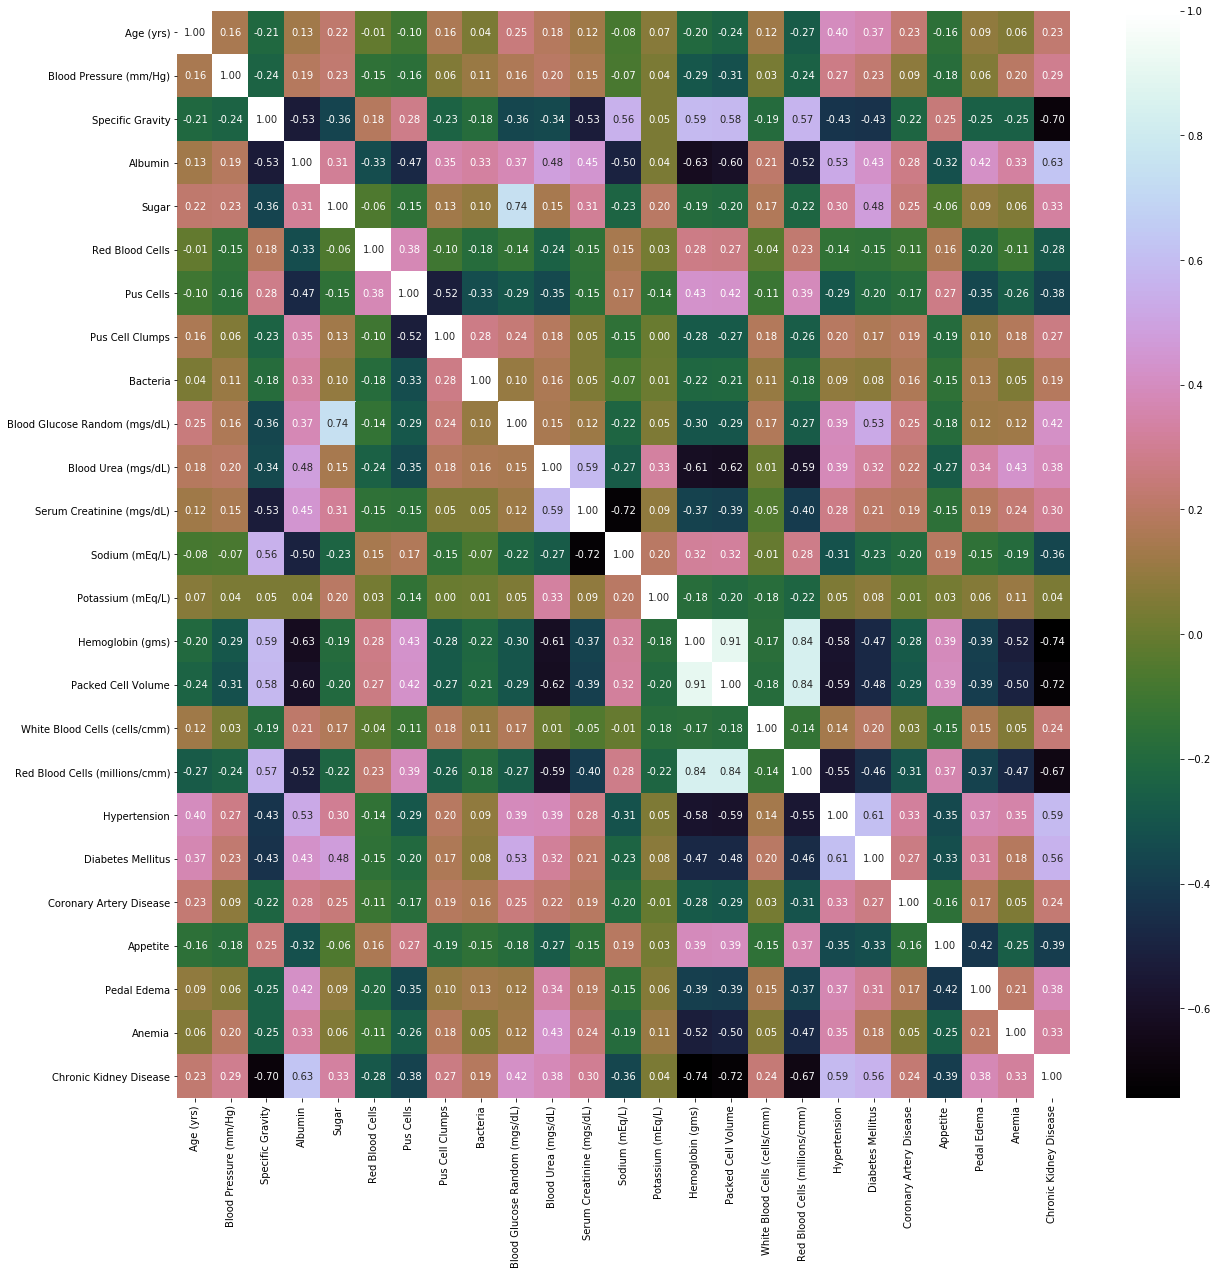

In [64]:
import seaborn as sns
corr = dfcorr.corr()
plt.figure(figsize=(20,20))
a = sns.heatmap(corr, annot=True, fmt='.2f', cmap="cubehelix")

Below is an additional correlation table.

In [65]:
print(dfcorr.corr())

                                Age (yrs)  Blood Pressure (mm/Hg)  \
Age (yrs)                        1.000000                0.155325   
Blood Pressure (mm/Hg)           0.155325                1.000000   
Specific Gravity                -0.208954               -0.238957   
Albumin                          0.130785                0.189334   
Sugar                            0.220146                0.225251   
Red Blood Cells                 -0.008535               -0.149265   
Pus Cells                       -0.101382               -0.157972   
Pus Cell Clumps                  0.158045                0.059906   
Bacteria                         0.042921                0.112325   
Blood Glucose Random (mgs/dL)    0.251971                0.163069   
Blood Urea (mgs/dL)              0.183316                0.198770   
Serum Creatinine (mgs/dL)        0.123026                0.148709   
Sodium (mEq/L)                  -0.078093               -0.073690   
Potassium (mEq/L)                0

I can see on the different correlations tables as well as on the heatmap that the attributes with the stronger correlation with my target variable are: 

- Chronic Kidney Disease and Specific Gravity: corr = -0.7
- Chronic Kidney Disease and Albumin: corr = +0.6
- Chronic Kidney Disease and Sugar: corr = +0.33
- Chronic Kidney Disease and Pus Cells: corr = -0.38
- Chronic Kidney Disease and Blood Glucose Random (mgs/dL): corr = +0.40
- Chronic Kidney Disease and Blood Urea (mgs/dL): corr = +0.37
- Chronic Kidney Disease and Sodium (mEq/L) (mgs/dL): corr = -0.34
- Chronic Kidney Disease and Hemoglobin (gms): corr = -0.73
- Chronic Kidney Disease and Packed Cell Volume: corr = -0.69
- Chronic Kidney Disease and Red Blood Cells (millions/cmm): corr = -0.59
- Chronic Kidney Disease and Hypertension: corr = -0.59
- Chronic Kidney Disease and Diabetes Mellitus: corr = +0.56
- Chronic Kidney Disease and Appetite: corr = -0.39
- Chronic Kidney Disease and Pedal Edema: corr = +0.38
- Chronic Kidney Disease and Anemia: corr = +0.33

This leads me to believe that it was a good thing to have converted the categorical column type to a numeric type so that they can be picked up by the correlation function calculation and the heatmap algorithm. If I had not done so I may have been missing very important factors linked to the odds of individuals to suffer from chronic kidney disease that constitutes the center of the question that my whole analysis is attempting to answer.


To look at the correlation that I have put in evidence through the correlation function and the heatmap, let me draw next an additional graph named "pairplot" that will display the relationship between different variables of the dataset in a "pairweise" arrangement. Pair plots are useful for seeing relationships between variables by plotting all pairs of variables against each other:

Drawing of the Pairs plot! At this point, I will shift my focus to the columns that have shown a strong correlation with the target variable (Chronic Kidney Disease).

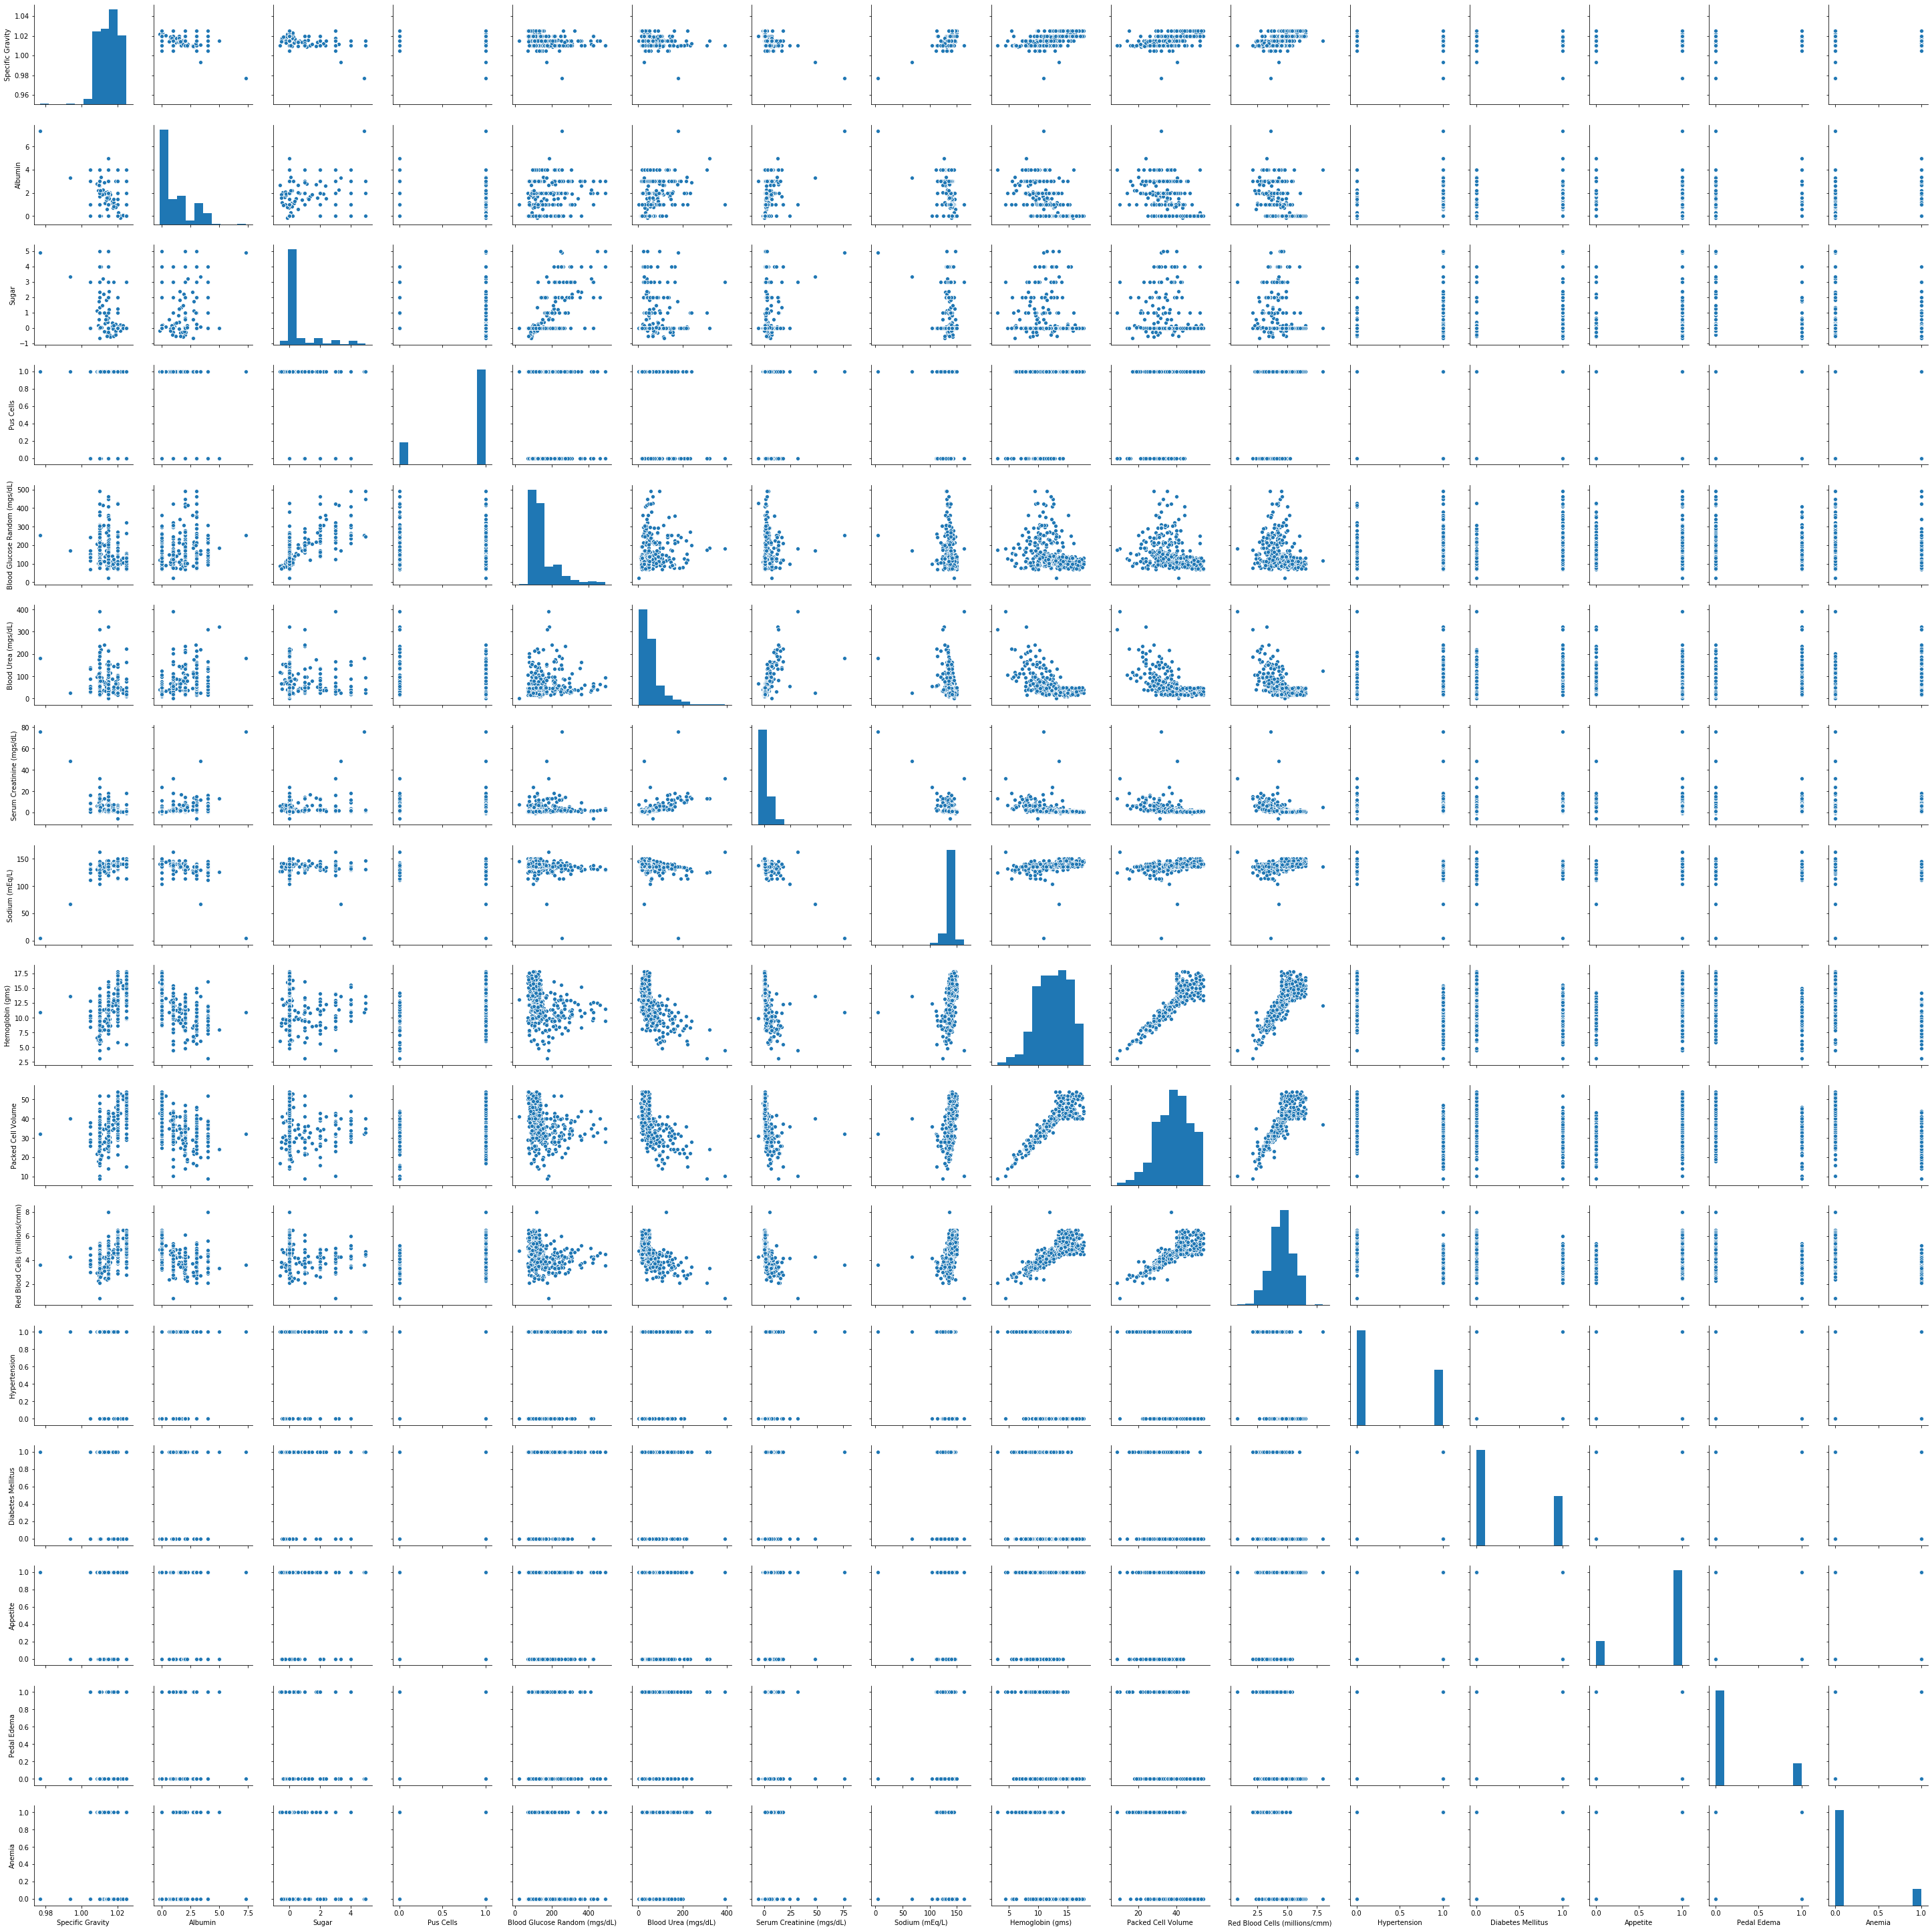

In [66]:
cols = ['Chronic_Kidney_Disease','Specific Gravity', 'Albumin', 'Sugar', 'Pus Cells', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus','Appetite','Pedal Edema','Anemia']
sns.pairplot(df1[cols])
plt.show();

The "pairplots" confirmed what we already knew regarding the correlation between different elements.

Now, looking at the results of the correlation function, the heat map as well as the "pairplot" graphs, moving forward, I will look closer into the relationships between these 9 pairs in the pursuit of answering the question "which factors are the most important regarding the odd of an individual to suffer of chronic kidney disease". "Hemoglobin (gms)" and "Red Blood Cells (millions/cmm)" represent similar type of values, therefore, I will remove the value that has the weaker correlation with the target variable, Red Blood Cells (millions/cmm)

Determining factors from a physician's perspective:
- Chronic Kidney Disease and Specific Gravity: corr = -0.7
- Chronic Kidney Disease and Albumin: corr = +0.6
- Chronic Kidney Disease and Hemoglobin (gms): corr = -0.73
- Chronic Kidney Disease and Packed Cell Volume: corr = -0.69
  
Factors to be taken seriously at home:
(May point towards the disease pending further analysis)
- Chronic Kidney Disease and Hypertension: corr = -0.59
- Chronic Kidney Disease and Diabetes Mellitus: corr = +0.56
- Chronic Kidney Disease and Appetite: corr = -0.39
- Chronic Kidney Disease and Pedal Edema: corr = +0.38
- Chronic Kidney Disease and Anemia: corr = +0.33

For further analysis, we will start by looking at the second group (Factors to be taken seriously at home)

Loading the "df1" dataset into a new dataset named "dfeda" to get it ready for the exploratory data analysis. This new dataset "dfeda" will be restricted to only the 10 variables chosen for further analysis.

In [67]:
dfeda=df1

In [68]:
dfeda = df1[["Specific Gravity", "Albumin","Hemoglobin (gms)","Packed Cell Volume","Hypertension","Diabetes Mellitus","Appetite","Pedal Edema","Anemia","Chronic_Kidney_Disease"]]
dfeda.head()

Specific Gravity  Albumin  Hemoglobin (gms)  Packed Cell Volume  \
0             1.020      1.0              15.4                44.0   
1             1.020      4.0              11.3                38.0   
2             1.010      2.0               9.6                31.0   
3             1.005      4.0              11.2                32.0   
4             1.010      2.0              11.6                35.0   

   Hypertension  Diabetes Mellitus  Appetite  Pedal Edema  Anemia  \
0             1                  1         1            0       0   
1             0                  0         1            0       0   
2             0                  1         0            0       1   
3             1                  0         0            1       1   
4             0                  0         1            0       0   

  Chronic_Kidney_Disease  
0                    yes  
1                    yes  
2                    yes  
3                    yes  
4                    yes

### Chronic Kidney Disease and Anemia: corr = +0.33

Before plotting the "Chronic Kidney Disease" vs "Anemia" diagram, it may be a good idea to look at how the "Chronic Kidney Disease" population is distributed.

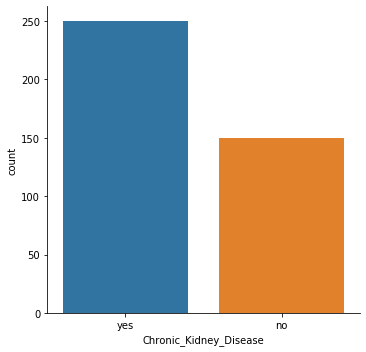

In [69]:
# Using the seaborn catplot function to pull out the graph.
sns.catplot('Chronic_Kidney_Disease', data=dfeda, kind='count')

The interpretation of the above graph showed us that more people suffered from chronic kidney disease compared to the "healthy". In other words, among all the patients, the number of individuals that were found sick from ckd was superior to the number of individuals that did not suffer from the disease. Precisely, among a total of 400 individuals, 250 ended up being diagnosed with the disease compared to 150 that were found not ill.

### Factors to be taken seriously at home: 
### (May point towards the disease pending medical consultation)

Now, let us look at how the "Anemia" population is distributed.

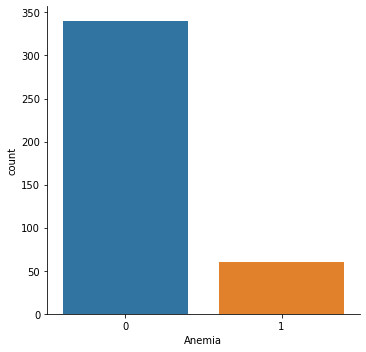

In [70]:
sns.catplot('Anemia', data=dfeda, kind='count')

The "Anemia" distribution above revealed to us that among the 400 individuals, 16.25% of them were anemic while 83.75% did not have the pre-existing condition of anemia.

For the "Chronic Kidney Disease" vs "Anemia" diagram, I will also use a factor plot, adding the "Anemia" column and change the graph from "count" to "point".

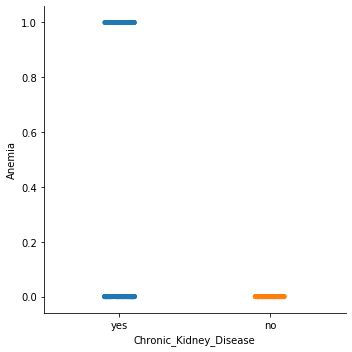

In [71]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Anemia')

The result of the graph speaks for itself. Individuals suffering from Anemia as a pre-existing condition are shown to also be diagnosed with ckd while the ones with no anemia tend not to be diagnosed with ckd. This indicates to us that anytime a relative is diagnosed with anemia, even before seeing a doctor we should keep in mind that this may also be an indication of a kidney problem.

### Chronic Kidney Disease and Pedal Edema: corr = +0.38

Let us look at how the "Pedal Edema" population is distributed.

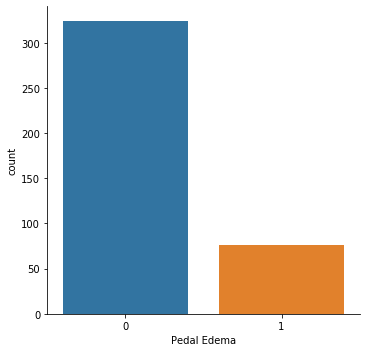

In [72]:
sns.catplot('Pedal Edema', data=dfeda, kind='count')

The "Pedal Edema" distribution above revealed to us that among the 400 individuals, 12.5% of them suffered from lower extremities swelling while 87.5% did not have the condition.

Now, let us draw the "Chronic Kidney Disease" vs "Pedal Edema" diagram, I will also use a factor plot for this diagram. 

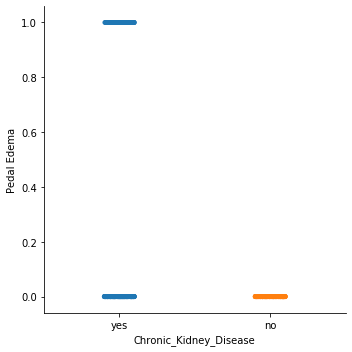

In [73]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Pedal Edema')

The result of the above graph shows us that the likelihood of someone suffering from ckd is very high when the person is experiencing pedal edema. Noticing the swelling of the lower extremities should be a sign that the patient's kidney may be starting to fail.

### Chronic Kidney Disease and Appetite: corr = -0.39

Let us look at how the "Appetite" population is distributed.

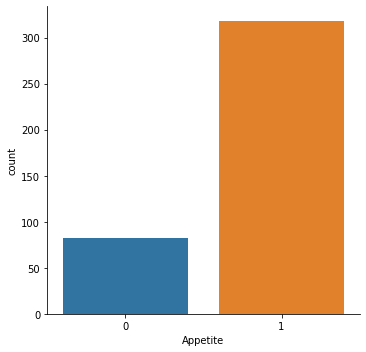

In [74]:
sns.catplot('Appetite', data=dfeda, kind='count')

The distribution above shows us that about 18.75% of our total population experienced a lack of appetite while 81.25% had a normal appetite.

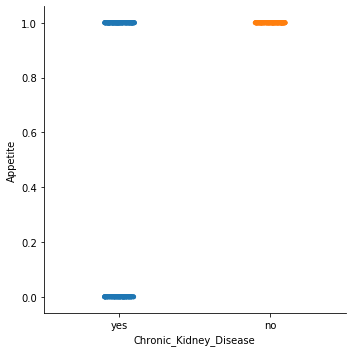

In [75]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Appetite')

Appetite appears to be related to the ckd in the sense that the less appetite a patient may be experiencing the more likely he may be starting to suffer from ckd. Here it is important to note that a factor such as appetite does not have too much weight when taken individually but will be of great importance when associated with other actors with a strong correlation with the target variable.

### Chronic Kidney Disease and Diabetes Mellitus: corr = +0.56

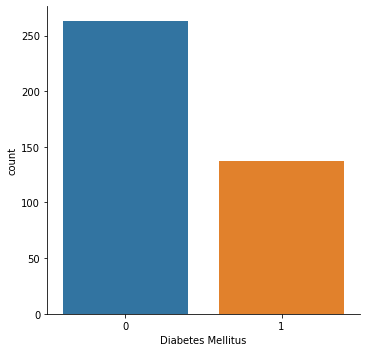

In [76]:
sns.catplot('Diabetes Mellitus', data=dfeda, kind='count')

The "Diabetes Mellitus" distribution graph displays 36.5% of the total population suffering from diabetes while 63.5% do not have diabetes. 

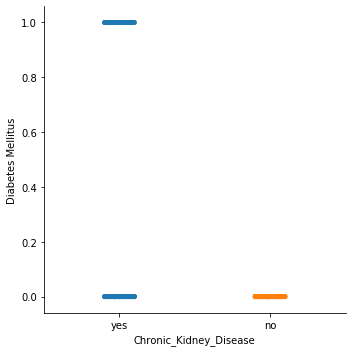

In [77]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Diabetes Mellitus')

People with diabetes mellitus are more likely to suffer from ckd while individuals that do not have diabetes mellitus are less prone to suffer from ckd.

### Chronic Kidney Disease and Hypertension: corr = -0.59

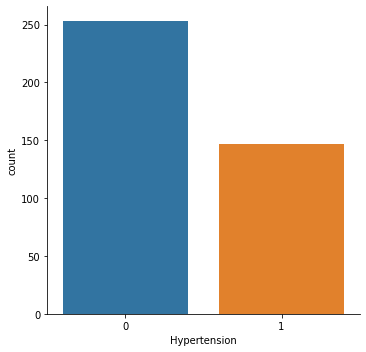

In [78]:
sns.catplot('Hypertension', data=dfeda, kind='count')

37 % of the total population suffered from hypertension while 63 % did not have hypertension.  

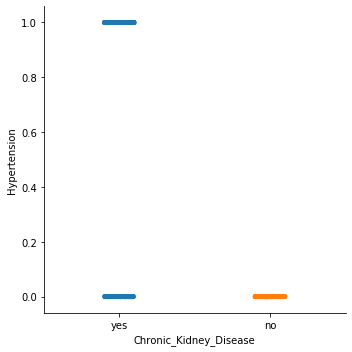

In [79]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Hypertension')

Being hypertensive dramatically increases the odds of also suffering from ckd. This will be another factor to look closely at while suspecting someone to suffer from ckd. In association with the other factors that were previously explored, hypertension should be considered while evaluating the chances of a patient experiencing kidney failure.

### Determining factors from a physician's perspective:

### Chronic Kidney Disease and Specific Gravity: corr = -0.7

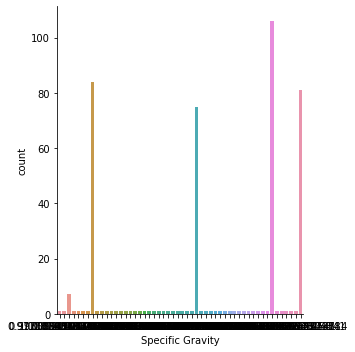

In [80]:
sns.catplot('Specific Gravity', data=dfeda, kind='count')

The graph above shows us that Specific Gravity is concentrated around four main values. Let us draw a different graph that will enable us to visualize these values. 

In [81]:
px.scatter(dfeda,'Specific Gravity')

Now, we can see the values around which the "Specific gravity" are concentrated (1.01, 1.015, 1.02, 1.025).

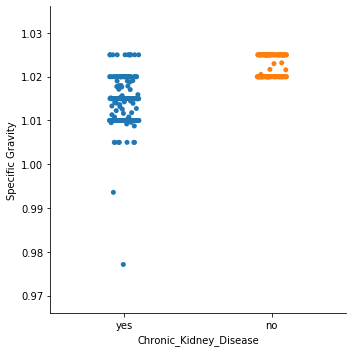

In [83]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Specific Gravity')

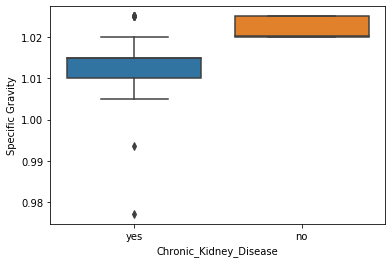

In [84]:
sns.boxplot(data=dfeda, x='Chronic_Kidney_Disease', y='Specific Gravity')

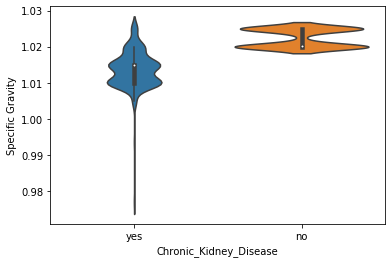

In [85]:
sns.violinplot(data=dfeda, x='Chronic_Kidney_Disease', y='Specific Gravity')

The plots presented in the above three graphs show us that the lower the value of the "specific gravity" the higher the chances to suffer of ckd are.

### Chronic Kidney Disease and Albumin: corr = +0.6

In [86]:
px.scatter(dfeda,'Albumin')

The graphic above shows us the different values that the Albumin level can take in humans. In our sample, patient albumin values vary between zero (0) and four (4) with two outliers values at (5) and (7.5).  It is important to note that the values are more concentrated around the albumin levels (0, 1, 2, 3, and 4).

In [87]:
px.scatter(dfeda,'Chronic_Kidney_Disease','Albumin')

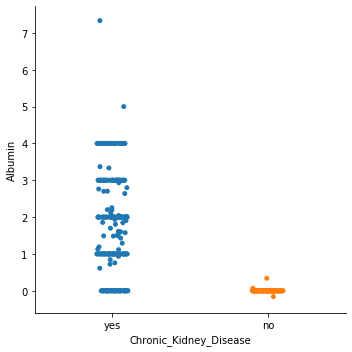

In [88]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Albumin')

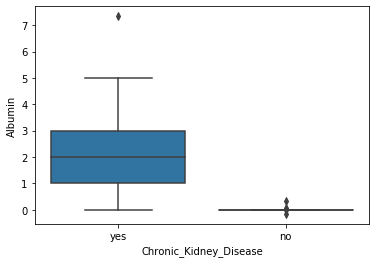

In [89]:
sns.boxplot(data=dfeda, x='Chronic_Kidney_Disease', y='Albumin')

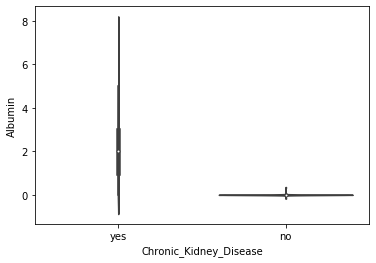

In [90]:
sns.violinplot(data=dfeda, x='Chronic_Kidney_Disease', y='Albumin')

In the three graphs above, it is evident to note that the higher the values of the Albumin are, the higher the odds of the patient to suffer of ckd is. This should be one of the values to be used by the physician in association with other parameters to establish a diagnostic of ckd.  

### Chronic Kidney Disease and Hemoglobin (gms): corr = -0.73

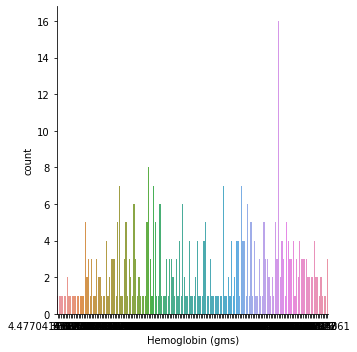

In [91]:
sns.catplot('Hemoglobin (gms)', data=dfeda, kind='count')

As we can notice, categorical plots are great for binary values as we can use a count to group the values into only two categories. Hemoglobin values are not binary values and we should use a scatter plot for example for a better representation.

In [92]:
px.scatter(dfeda,'Hemoglobin (gms)')

In the above graph, it can be seen that a scatter plot was the best approach to represent the hemoglobin values.

In [93]:
px.scatter(dfeda,'Chronic_Kidney_Disease','Hemoglobin (gms)')

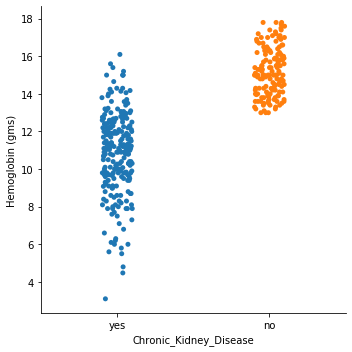

In [94]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Hemoglobin (gms)')

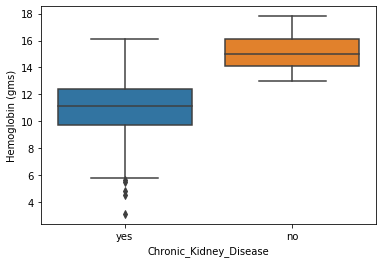

In [95]:
sns.boxplot(data=dfeda, x='Chronic_Kidney_Disease', y='Hemoglobin (gms)')

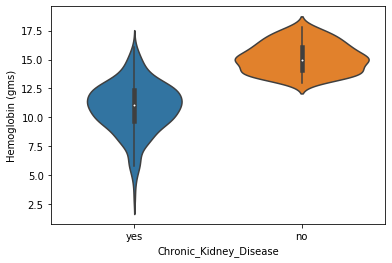

In [96]:
sns.violinplot(data=dfeda, x='Chronic_Kidney_Disease', y='Hemoglobin (gms)')

These three graphics put in evidence the behavior of hemoglobin values compared to the odds of a patient to suffer from ckd. The higher the values of the hemoglobin the lower the chances of the patient getting ill with ckd, respectively, the lower the values of the hemoglobin, the higher the chances of the patient to suffer from the disease. This Can be understandable because the kidney plays a critical; role in the synthesis of red blood cells through a hormone that it produces (erythropoietin). It makes sense that a sick kidney will no longer produce the hormone efficiently thus red blood cells will not be produced at an optimal level necessary to guarantee great values for hemoglobin.

### Chronic Kidney Disease and Packed Cell Volume: corr = -0.69

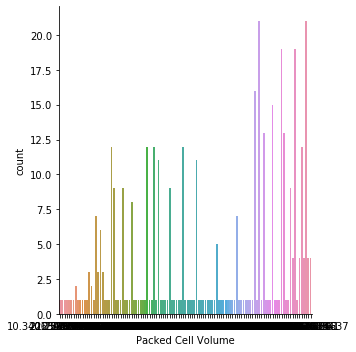

In [97]:
sns.catplot('Packed Cell Volume', data=dfeda, kind='count')

In [98]:
px.scatter(dfeda,'Packed Cell Volume')

The above scatter plot shows a great distribution of the "Packed Cell Volume" values in our dataset. 

In [99]:
px.scatter(dfeda,'Chronic_Kidney_Disease','Packed Cell Volume')

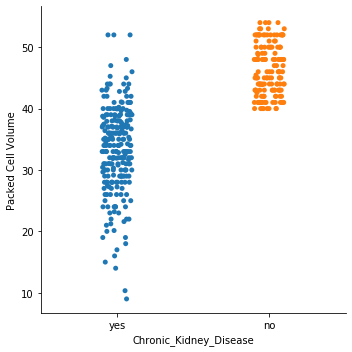

In [100]:
sns.catplot(data=dfeda, x='Chronic_Kidney_Disease', y='Packed Cell Volume')

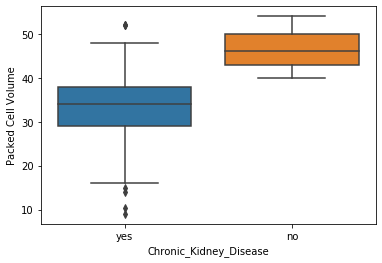

In [101]:
sns.boxplot(data=dfeda, x='Chronic_Kidney_Disease', y='Packed Cell Volume')

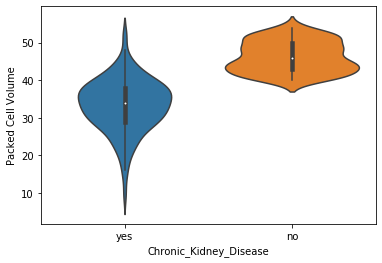

In [102]:
sns.violinplot(data=dfeda, x='Chronic_Kidney_Disease', y='Packed Cell Volume')

The plots above show us that the higher the values of the "Packed Cell Volume" is, the lower the chances of the individual to suffer of ckd, inversely, the lower the value of the "Packed Cell Volume" is the higher the odds of the patient to be diagnosed of ckd. This should be another factor of great interest to the physician while diagnosing ckd in a patient.

## 3) Using a machine learning model to predict the odds of a patient to suffer from ckd.

Loading the "dfeda" dataset into a new dataset named "dfml" (df machine learning) to get it ready for the machine learning model.

In [103]:
dfml=dfeda

In [104]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Specific Gravity        400 non-null    float64
 1   Albumin                 400 non-null    float64
 2   Hemoglobin (gms)        400 non-null    float64
 3   Packed Cell Volume      400 non-null    float64
 4   Hypertension            400 non-null    int64  
 5   Diabetes Mellitus       400 non-null    int64  
 6   Appetite                400 non-null    int64  
 7   Pedal Edema             400 non-null    int64  
 8   Anemia                  400 non-null    int64  
 9   Chronic_Kidney_Disease  400 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.4+ KB


### 3.1) Getting the data ready for the machine learning model.

The column "Chronic_Kidney_Disease" is now considered my output vector. The machine learning model will be made ready to predict whether or not a hypothetical patient will suffer from ckd. It will directly provide the result in a ckd (1) or no-ckd (0) form.

In [105]:
# The "Chronic_Kidney_Disease" output vector is assigned to the "y" variable. This will be the "result" vector.
y = dfml.Chronic_Kidney_Disease
print(y)

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
395     no
396     no
397     no
398     no
399     no
Name: Chronic_Kidney_Disease, Length: 400, dtype: object


Next, I need to remove the ‘Chronic_Kidney_Disease‘ column from the dataset to get the input vector (x), because it can not be present on both ends.

In [106]:
# The input vector is removed from the machine-learning's ready dataset.
x=dfml.drop('Chronic_Kidney_Disease',axis=1)
x.head()

Specific Gravity  Albumin  Hemoglobin (gms)  Packed Cell Volume  \
0             1.020      1.0              15.4                44.0   
1             1.020      4.0              11.3                38.0   
2             1.010      2.0               9.6                31.0   
3             1.005      4.0              11.2                32.0   
4             1.010      2.0              11.6                35.0   

   Hypertension  Diabetes Mellitus  Appetite  Pedal Edema  Anemia  
0             1                  1         1            0       0  
1             0                  0         1            0       0  
2             0                  1         0            0       1  
3             1                  0         0            1       1  
4             0                  0         1            0       0

The "Chronic_Kidney_Disease" column has been successfully dropped.

### 3.2) Splitting the data for the machine learning model.

The split ratio defines which portion of the dataset is going to the training set and which other portion of it is going to the testing set. The training set is generally greater than the test set. 70:30 is the most common split ratio used by data scientists. A 70:30 split ratio means that 70% of the dataset will go to the training set while 30% of the remaining dataset will go to the testing set. We will use train_test_split from the Sklearn library to split the data. Train-test-split randomly distributes the information according to the ratio given in training and testing.

Importing the splitting method.

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
#splitting the data !
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Verifying that the split was successful.

In [109]:
print("shape of original dataset :", dfml.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (400, 10)
shape of input - training set (280, 9)
shape of output - training set (280,)
shape of input - testing set (120, 9)
shape of output - testing set (120,)


### 3.3) Importing the model I want to use.

The next step consists of importing the model that I want to use. Since the problem solved is one in which the response is supposed to be presented in the form of either the patient "may not have ckd" 'no' or "may have ckd" 'yes', the best method to solve these types of classification problems is usually the logistic regression model. 

In [110]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=6000)
model.fit(x_train,y_train)
log_model = LogisticRegression(solver='lbfgs', max_iter=6000)

### 3.4) Creating an instance of the Model.

In [111]:
logisticR = LogisticRegression()

### 3.5) Training the model on the data.

In [112]:
logisticR.fit(x_train, y_train)

LogisticRegression()

### 3.6) Testing my model.

Letting the model use the information it learned during the model training process in 3.5) to predict the outcome of the first 10 elements.

In [113]:
logisticR.predict(x_test[0:10])

array(['yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no'],
      dtype=object)

Now, providing the full set of the test data to the model to retrieve the predictions on all the test dataset.

In [114]:
predictions = logisticR.predict(x_test)
print(predictions)

['yes' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'no'
 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes'
 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes'
 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes']


### 4) Model Evaluation and Validation.

Many methods can be used to measure a model's performance (precision, recall, F1 Score, ROC Curve, etc), I am going to use the accuracy test as a simple straight calculation that can help us determine how accurate is the model. The simple way to proceed is to see how the model performs on the test dataset. 

The accuracy is defined as (fraction of correct predictions): correct predictions / total number of data points

I should keep in mind that I had deleted the "Chronic_Kidney_Disease" column entirely from the output variable, but a corresponding known result is still stored in the other variable. This means that after the model has processed all the rows from the test data that is submitted to it, It is possible to compare its result with the actual result and figure out its level of accuracy from there. This is also how the model got trained. We can teach it how to get better at predicting by correcting it. This is the beauty of machine learning.

### 4.1) Using the "score" method to calculate the accuracy of the model.

In [115]:
# Logistic Regression
acc_log = round(logisticR.score(x_test, y_test) * 100, 2)
print(acc_log)

95.83


The accuracy is 96.67, and it is a very good result in my opinion. 

N.B. The professor should keep in mind that this result may change if he executes the script from scratch while grading this practicum.

Another method to look at the accuracy of our model could also have been to compare it with other models to see how it fares. The problem solved is one in which the response was in a probabilistic format 'no' and 'yes', triggered me to think about a logistic regression model as a way to solve it. We should keep in mind that there are at least 50 predictive modeling algorithms that could have been used to solve this problem. The reality is that this type of problem gets down to just a few models that can be compared to each other. As stated before, this problem was a classification and a regression problem. The question that I aimed to answer was to identify the correlation between the output vector (Chronic_Kidney_Disease) with other variables ('Specific Gravity','Albumin','Hemoglobin (gms)','Packed Cell Volume','Hypertension','Diabetes Mellitus','Appetite','Pedal Edema','Anemia') that presented a strong correlation against our response variable (Chronic_Kidney_Disease). We were also at the same time performing a machine learning variant which is called "supervised learning" because we were training our model by exposing it to a test dataset thus teaching (supervising) it how to find the correct odds of a patient suffering from "chronic kidney disease". With these three criteria (Regression, Classification, and Supervised Learning), I can select these other models from the initial list as alternative solutions to solve the problem.

1) KNN or k-Nearest Neighbors

2) Support Vector Machines

3) Naive Bayes classifier

4) Decision Tree

5) Random Forrest

6) Perceptron

7) Artificial neural network

Before running our data through these additional models, let us first import their libraries.

In [116]:
#from sklearn.linear_model import LogisticRegression
#model=LogisticRegression(max_iter=6000)
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
#model=LinearSVC(max_iter=4000)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 4.2) Running the data through additional models.

### 4.2.1) KNN or k-Nearest Neighbors

In [117]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)
print(acc_knn)

92.5


### 4.2.2) Support Vector Machines

In [118]:
# Support Vector Machines (SVC)
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
print(acc_svc)

91.67


### 4.2.3) Naive Bayes classifier

In [119]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
print(acc_gaussian)

93.33


### 4.2.4) Decision Tree

In [120]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
print(acc_decision_tree)

97.5


### 4.2.5) Random Forrest

In [121]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
print(acc_random_forest)

98.33


### 4.2.6) Perceptron

In [122]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_test, y_test) * 100, 2)
print(acc_perceptron)

68.33


### 4.2.7) Artificial neural network

In [123]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_test, y_test) * 100, 2)
print(acc_sgd)

90.0


### 4.3) Comparing the models.

In [124]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Support Vector Machines', 'Naive Bayes', 'Decision Tree', 'Random Forest', 
              'Perceptron', 'Stochastic Gradient Decent'],
    'Score': [acc_log, acc_knn, acc_svc, acc_gaussian, acc_decision_tree, acc_random_forest, acc_perceptron, acc_sgd]})    
models.sort_values(by='Score', ascending=False)

Model  Score
5               Random Forest  98.33
4               Decision Tree  97.50
0         Logistic Regression  95.83
3                 Naive Bayes  93.33
1                         KNN  92.50
2     Support Vector Machines  91.67
7  Stochastic Gradient Decent  90.00
6                  Perceptron  68.33

The above table shows that my initial model (Logistic Regression) was ranked in second position, pointing to the fact that the choice I made to use a Logistic Regression model to solve this classification probabilistic problem was one of the best approaches eventhough the best choice is clearly the Random Forest algorithm.

### 5) Model evaluation on Factors to be taken seriously at home.

In [125]:
dfeda2 = df1[["Hypertension","Diabetes Mellitus","Appetite","Pedal Edema","Anemia","Chronic_Kidney_Disease"]]
dfeda2.head()

Hypertension  Diabetes Mellitus  Appetite  Pedal Edema  Anemia  \
0             1                  1         1            0       0   
1             0                  0         1            0       0   
2             0                  1         0            0       1   
3             1                  0         0            1       1   
4             0                  0         1            0       0   

  Chronic_Kidney_Disease  
0                    yes  
1                    yes  
2                    yes  
3                    yes  
4                    yes

### 5.1) Getting the data ready for the machine learning model.

Loading the "dfeda2" dataset into a new dataset named "dfml2" to get it ready for the machine learning model.

In [126]:
dfml2=dfeda2

In [127]:
# The "Chronic_Kidney_Disease" output vector is assigned to the "y" variable. This will be the "result" vector.
y = dfml2.Chronic_Kidney_Disease
print(y)

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
395     no
396     no
397     no
398     no
399     no
Name: Chronic_Kidney_Disease, Length: 400, dtype: object


Next, I need to remove the ‘Chronic_Kidney_Disease‘ column from the dataset to get the input vector (x), because it can not be present on both ends.

In [128]:
# The input vector is removed from the machine-learning's ready dataset.
x=dfml2.drop('Chronic_Kidney_Disease',axis=1)
x.head()

Hypertension  Diabetes Mellitus  Appetite  Pedal Edema  Anemia
0             1                  1         1            0       0
1             0                  0         1            0       0
2             0                  1         0            0       1
3             1                  0         0            1       1
4             0                  0         1            0       0

### 5.2) Splitting the data for the machine learning model.

The split ratio defines which portion of the dataset is going to the training set and which other portion of it is going to the testing set. The training set is generally greater than the test set. 70:30 is the most common split ratio used by data scientists. A 70:30 split ratio means that 70% of the dataset will go to the training set while 30% of the remaining dataset will go to the testing set. We will use train_test_split from the Sklearn library to split the data. Train-test-split randomly distributes the information according to the ratio given in training and testing.

Importing the splitting method.

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
#splitting the data !
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

Verifying that the split was successful.

In [131]:
print("shape of original dataset :", dfml2.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (400, 6)
shape of input - training set (280, 5)
shape of output - training set (280,)
shape of input - testing set (120, 5)
shape of output - testing set (120,)


### 5.3) Importing the model I want to use.

The next step consists of importing the model that I want to use. Since the problem solved is one in which the response is supposed to be presented in the form of either the patient "may not have ckd" 'no' or "may have ckd" 'yes', the best method to solve these types of classification problems is usually the logistic regression model.

In [132]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=6000)
model.fit(x_train,y_train)
log_model = LogisticRegression(solver='lbfgs', max_iter=6000)

### 5.4) Creating an instance of the Model.

In [133]:
logisticR2 = LogisticRegression()

### 5.5) Training the model on the data.

In [134]:
logisticR2.fit(x_train, y_train)

LogisticRegression()

### 5.6) Testing the model.

In [135]:
logisticR2.predict(x_test[0:10])

array(['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no'],
      dtype=object)

Letting the model use the information it learned during the model training process in 5.5) to predict the outcome of the first 10 elements.

In [136]:
logisticR2.predict(x_test[0:10])

array(['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no'],
      dtype=object)

Now, providing the full set of the test data to the model to retrieve the predictions on the entire test dataset.

In [137]:
predictions = logisticR2.predict(x_test)
print(predictions)

['yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no'
 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'yes'
 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes'
 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes'
 'no' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no'
 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'no'
 'yes' 'no' 'yes']


The prediction's result obtained from the subset of the model corresponding to the "factors to be taken seriously at home" is identical to the results from the main model. This leads us to the conclusion that predicting the odds of an indiviual to suffer from ckd from the primary factors (factors to be taken seriously at home) is as effective and accurate as clinicals factors (factors used by physians and clinicians in a clinical settings). 

### Conclusion

The goal of my project was to find out the most important factor(s) that influence the likelihood of an individual to suffer from ckd (chronic kidney disease), and to predict the odds of a random person either getting diagnosed with the disease (yes) or not (no). The answer to the question was approached in two ways. The first finding focused on factors to be taken seriously at home (Hypertension, Diabetes Mellitus, Appetite, Pedal Edema Anemia). It was put in evidence that anyone with a history of High Blood Pressure and Diabetes Mellitus will immediately seek close medical attention whenever he also experiences a loss of appetite, Anemia, and swelling of his legs (Pedal Edema). Once in the hospital, the doctor should look at a second group of factors to determine if the suspicion of ckd is confirmed by looking at a second group of factors such as (Specific Gravity, Albumin, Hemoglobin (gms), and Packed Cell Volume). One of the interesting findings was that, by circumscribing the data to a subset made uniquely of the factors to be taken seriously at home, we obtained the same result as the one obtained from the primary model. This led us to deduct that factors that we considered that may have been not as important as the clinical factors seem to play an equal role in the process of diagnosing the disease.  

The methodology used to arrive at this conclusion and result was first to run correlation functions on the data to set apart the factors having a strong correlation with the target variable. Secondly, I proceeded with an exploratory data analysis (EDA) of the data. This section helped me to look at the data from a wide angle and it solidified the result from the correlations functions. The predicting phase of the project was achieved by two approaches. I chose the regression method because it appeared to me to be the algorithm of choice for this type of problem. I applied the regression function in the main dataset at first and in a second approach, I reapplied it on a sub-dataset made solely of factors that I qualified as the ones to be taken seriously at home (Hypertension, Diabetes Mellitus, Appetite, Pedal Edema Anemia). I obtained the same result from the two approaches. This solidified the fact that these factors deemed to be "home factors" should also be taken with all seriousness while diagnosing kidney failure. The Logistic Regression method "LogisticRegression()" from "sklearn.linear_model" that I used to solve this problem returned an accuracy score of 99.17. This is considered a great accuracy result. Further validation was done by running the data through other well-established machine-learning models, the big surprise was that two of these models, (Decision tree and Random Forest) returned a better score than the Logistic Regression algorithm that I had chosen.

The model accuracy of the Regression algorithm could have been improved if we were not dealing with just a sample of the data. The fact that we are working with only a sample (fraction) of the data has an impact on the accuracy because a sample will never represent a dataset as its whole. I do not know how difficult it is in a clinical setting to gather data about patients, but I believe a dataset with more data would have maybe contributed to better accuracy. The second point that could have helped with improving the accuracy of the regression algorithm and some other algorithms that returned a low score is missing data. But this second point is not very impactful because even though the missing data were present in all the columns except the target column, they were still replaced either by the mice for continuous variables or by the mode for categorical variables. Each time when the NaNs are replaced by one of the inputting algorithms, it helps at getting the dataset to a working stage but inputted values will remain what they are and will never replace the actual missing data. Another point is that one or two of the algorithms used for the prediction have predicted the result with an accuracy of 100%, thus demonstrating that with the same data such a perfect level of accuracy could be achieved.

I can affirm as a final thought that this project helped cover the vast majority of the concepts that were taught throughout the entire curriculum, this was a complete data science project starting from the data engineering phase into a supervised machine learning part encompassing training and testing. The exploratory data analysis part also covered the data visualization concept of the program. This is surely a great preparation for the dynamic work environment in the data field and will assist me in becoming a very competitive Data Engineer because I have a very good knowledge of how the data that I will be preparing and cleaning will be used at the other end.